# 1. 분류란?

## (1) 지도 학습: 회귀 vs 분류
- 회귀: 연속적인 숫자 값 예측
  - X들을 기반으로 Y를 잘 맞히는 fit
  - 연속형 변수
- 분류: 데이터를 주어진 항목으로 나누기
  - 기존 데이터가 어떤 항목에 속하는지 학습한 후, 새로운 데이터를 분류하는 것
  - 대출상환여부(0/1) 예측
  - 범주형 변수
  - 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접 알고리즘
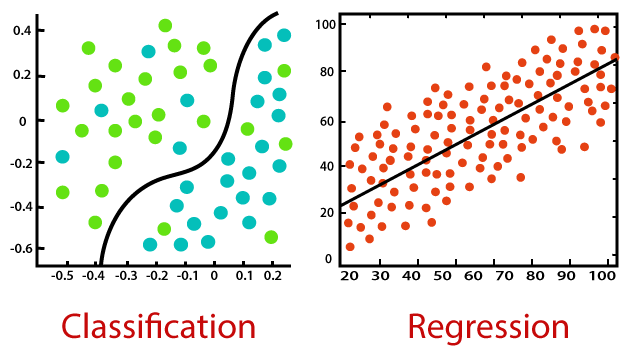


## (2) 이진 분류와 다중 분류
- 이진 분류: 예측 변수가 어떤 기준으로 참/거짓으로 나뉠 때
- 다중 분류: 예측 변수가 3개 이상으로 나뉠 때

# 2. 분류 모델
## (1) 로지스틱 회귀 (Logistic Regression)

- 이진 분류 문제를 푸는 알고리즘
- 샘플이 특정 클래스에 속할 확률을 추정
> 선형회귀에 로지스틱 함수를 적용하여 출력값을 0 ~ 1 사이로 변환해줌.
- 이진 분류 문제를 해결하는 데에 적합
  - 이메일 스팸, 질병 유무

### 로지스틱 회귀의 필요성

이진 분류를 선형회귀로 풀려 하면 문제가 생긴다. <br/>
예를 들어, 시험 성적에 따라 합불이 기재된 데이터(시험 성적:x 합불 결과: y)가 있다.<br/><br/>
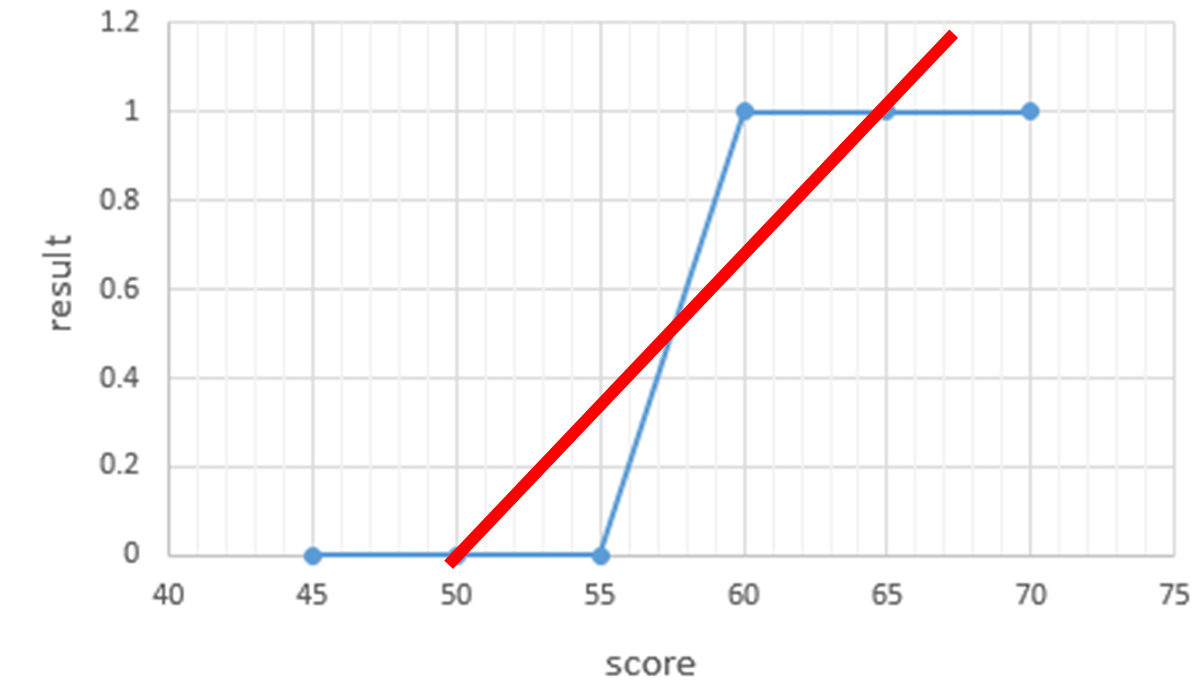<br/><br/>
사진처럼 선이 걸쳐지게 되어 분류 작업이 제대로 이뤄지지 않는다.<br/>
- 직선이 아닌 S자 형태 함수가 필요하다(시그모이드 함수).
- 예측값은 0~1 사이 값을 가져야 하는데 직선은 이 범위를 벗어나게 된다.

### 시그모이드 함수(Sigmoid function)
- 0~1 사이로 출력하면서 S자 형태로 그려지는 함수<br/><br/>
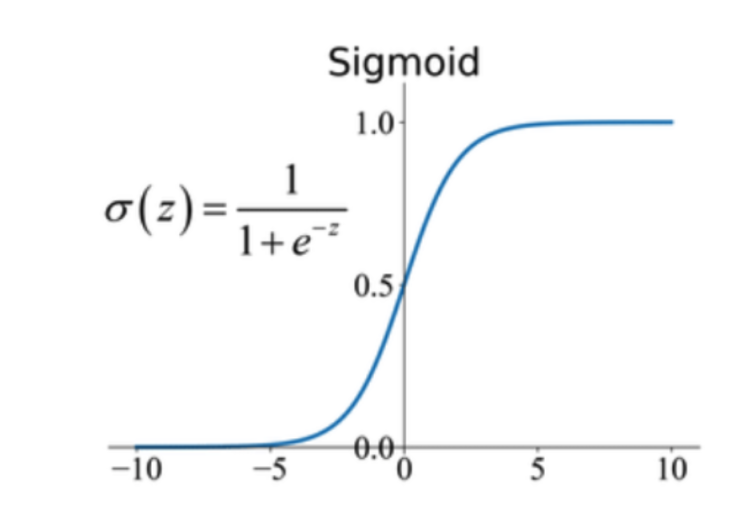<br/><br/>
- 입력값이 커지면: 1에 수렴
- 입력값이 작아지면: 0에 수렴
- $x$: $(-\infin, \infin)$ -> $y$: 0~1
- 출력값이 특정값 이상이면 1, 특정값 이하면 0이다.

### 시그모이드 함수의 가중치
$$H(x)=\frac{1}{1+e^{-(wx+b)}}=sigmoid(wx+b)=\sigma(wx+b)$$
- 여기서 적합한 w, b를 계산하여 찾는다.

1. 가중치($w$)에 따른 그래프 변화
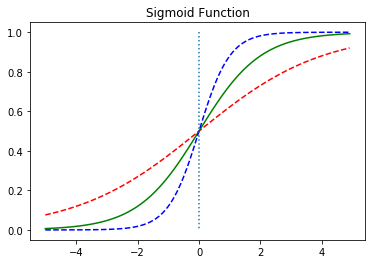
- 빨간색: 0.5, 파란색: 2.0
- 커지면 가파라짐
2. $b$에 따른 그래프 변화
<br/>
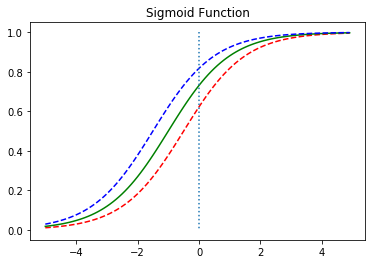
- 빨간색: 0.5, 파란색: 1.5
- 커지면 왼쪽으로 감
<br/><br/>

<참고: 승산(Odds, 오즈)>
$$odds=\frac{p(A)}{p(A^c)} = \frac{p(A)}{1-p(A)}$$
- $\frac{사건이 일어날 확률}{안 일어날 확률}$
  - 스포츠 경기 배당금 등
- 발생 확률이 안 발생 확률보다 몇 배 높은지 알려줌.
<br/><br/>
- 로지스틱: 선형회귀+시그모이드 = 비선형성!!이라 직관적으로 파악하기 어려움.
- 로지스틱에 적용하는 이유는 **해석을 직관적으로 하려고**

## (2) 의사결정나무(Decision Tree)
- 조건에 따라 데이터를 분류 -> 순수한 label로 구성될 때까지 분류 반복
- 스무고개라고 생각하자.

### 의사결정나무의 구성 요소
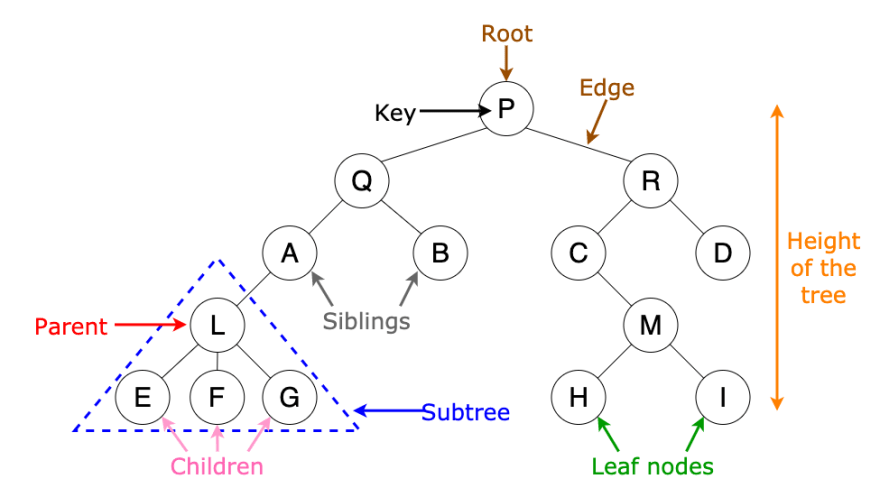
- **Root Node**: 최상위 노드
- **Parent Node**: 특정 노드의 부모 노드
- **Child Node**: 특정 노드에서 자식 노드들
- **Binary Tree**(이진 트리): 자식 수가 최대 2인 트리
- **Leaf Nodes**: 자식이 없는 노드 = label
- **Edge**: 노드 간 연결 다리
- **Height**: 특정 노드에서 가장 먼 leaf까지 경로에 있는 다리 수
- **Depth:** Root에서 특정 노드에 가기 위한 다리 수

### CART(이진분할; Classification And Regression Tree) 알고리즘
- 데이터을 임계값 기준으로 두 child로 나누는 알고리즘
- 임계값: 불순도(지니 계수)가 낮아지는 방향으로 나눠야 함!!
  - 불순도? 서로 다른 범주가 섞인 정도
  - 지니 계수? 통계 분산 정도를 정량화하여 표현(0~1)
    - 0.5면 제일 안 좋은 것: 반반 섞여 있다.
    - $Gini=1-\sum_{i=1}^n{P_i}^2,\space P_i\text{는 class i의 비율}$
- 지니 계수가 작아지는 방향으로 학습함.

#### CART 알고리즘의 주요 단계
1. 임계값 설정<br/><br/>
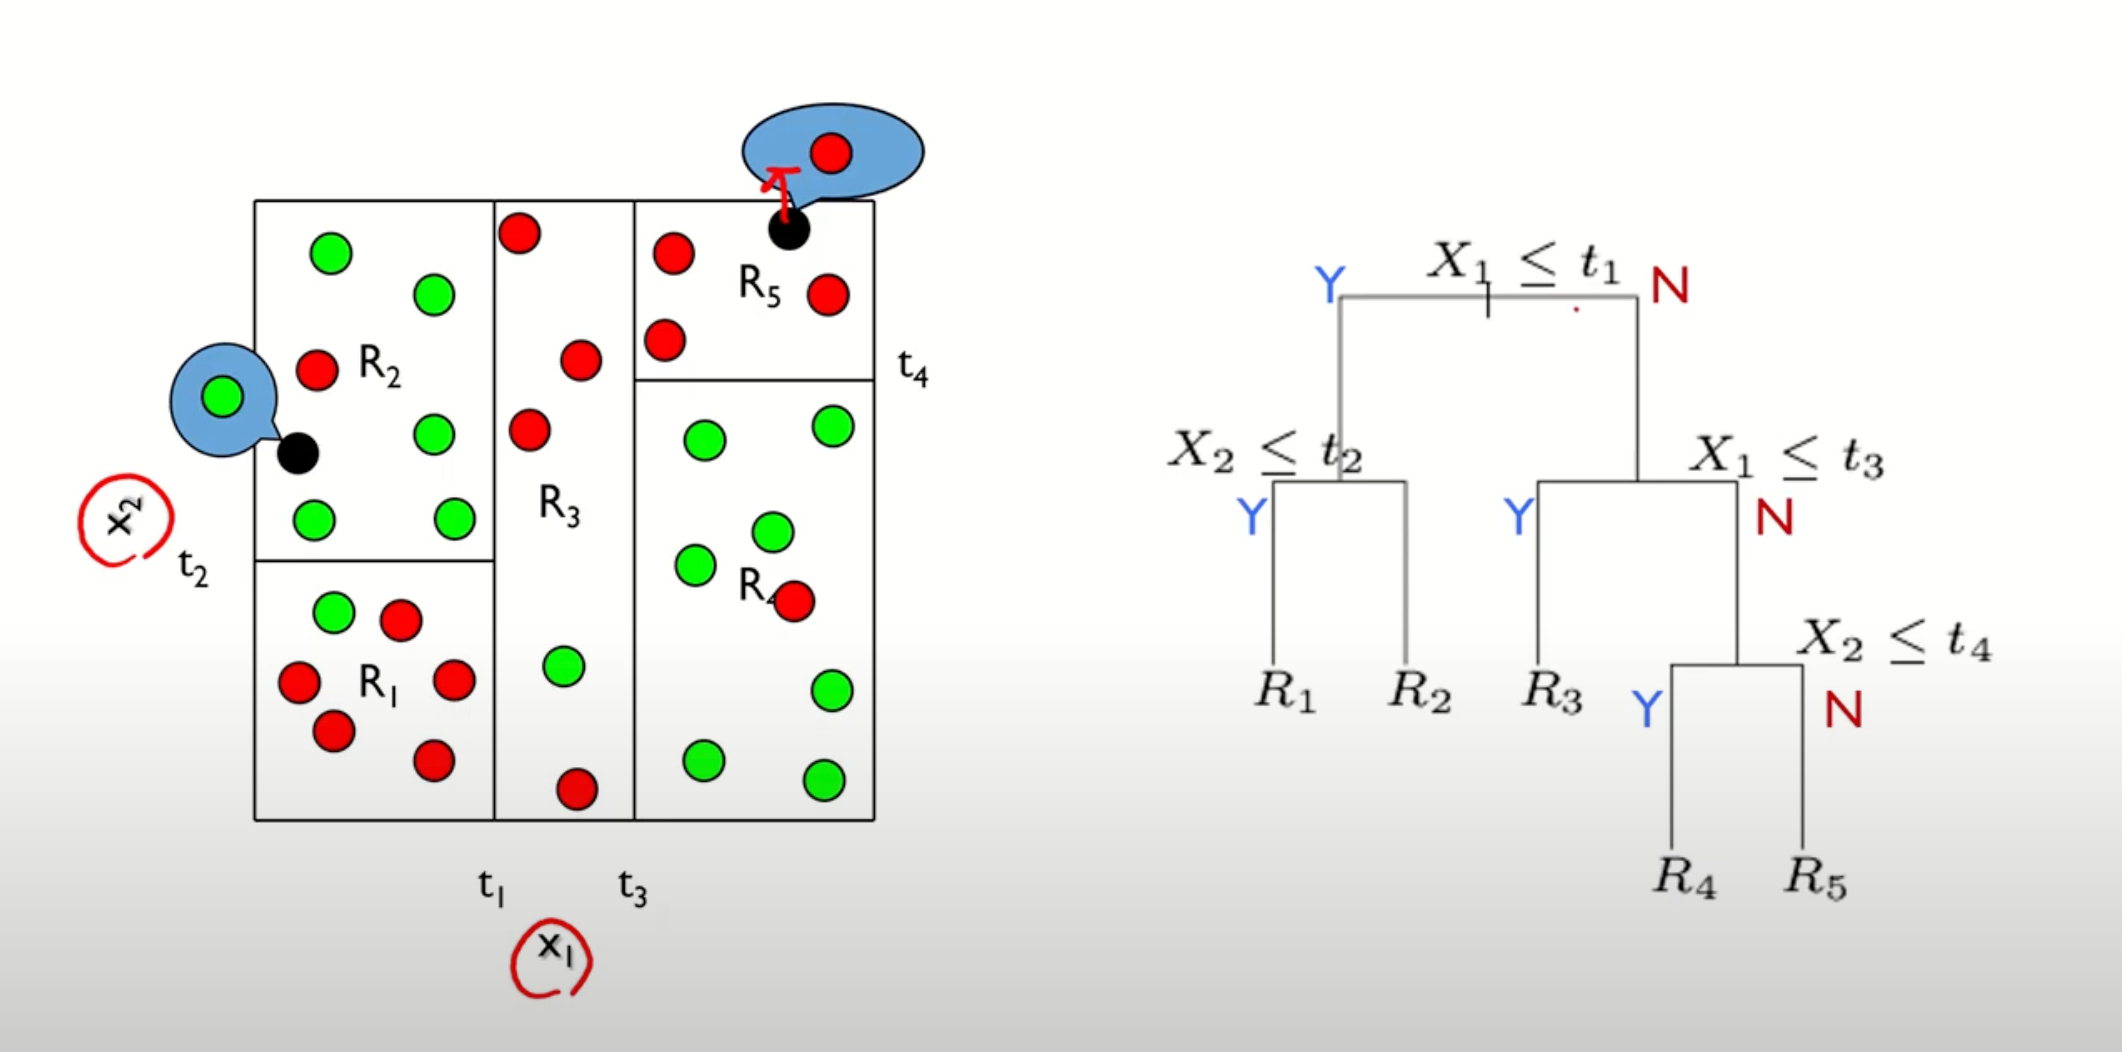
- 이 경우 t4의 임계값을 고른다.
2. 불순도 감소 알고리즘
- 이 알고리즘으로 불순도가 낮은 쪽으로 가지를 형성해나감.

#### CART 알고리즘의 한계
- greedy라 당장의 경우만 고려한다.
- 미래를 고려하지 않음.

### 실제 고려해야 할 것들: 모수 설정, 차이점 시각화, Prunning

1. Hyperparameter 설정
- min_samples_split: 노드의 최소 샘플 수
- min_samples_leaf: 리프 노드의 최소 샘플 수
- min_weight_fraction_leaf: min_samples_leaf와 같음. 가중치가 부여된 전체 샘플 수에 대한 비율
- max_leaf_nodes: 리프 노드의 최대 수
- max_features: 각 노드의 특성 최대 수

2. 시각화
- 분류 잘 되었는지 확인
- 규제를 넣어주면 과적합 예방 가능<br/><br/>
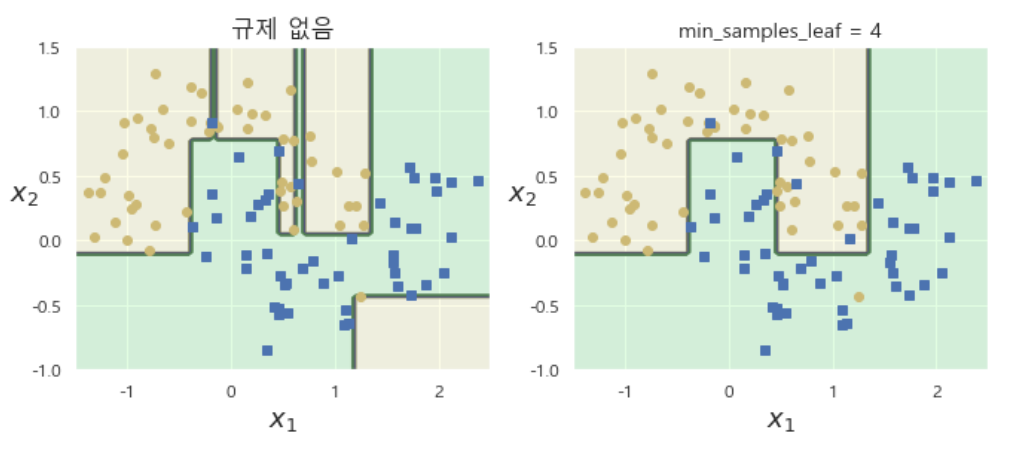
<br/>
3. 가지치기(Prunning)
- 과적합 예방.
- 일반화 성능 높이기
- 깊이가 줄어들고 결과 수가 줄어들음.

## (3) SVM(Support Vector Machine)
- 데이터를 분리하는 초평면 중 데이터와 가장 먼 것을 선택하여 분리
- 고차원에서도 효과적(패턴 인식, 이미지 분석, 바이오인포매틱스 등)

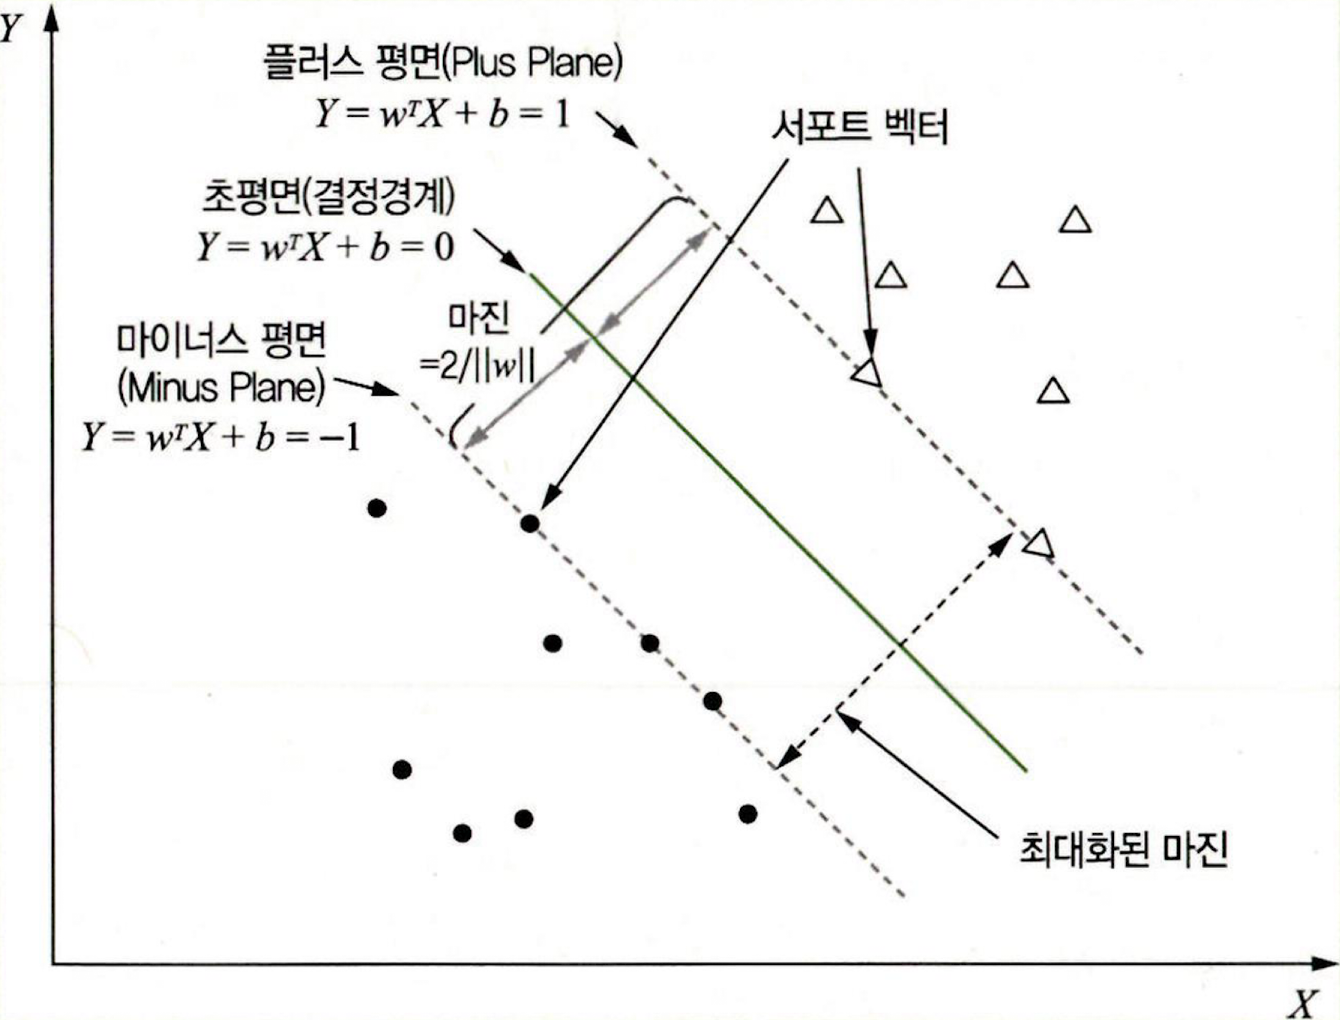<br/>
- Support vector: 결정 경계와 가까운 데이터 집합
- Decision Boundary(결정 경계): 분류의 기준이 되는 경계
- Margin: 결정 경계에서 서포트 벡터까지의 거리
- Hyperplane(초평면): n-1차원 평면
- Slack Variables(여유변수): 완벽한 분리가 불가능할 때, 오차에 대한 변수

#### 최적의 선을 찾는 방법
- 결정 경계는 데이터와 멀리 떨어져 있을수록 좋다.
- margin이 가장 큰 경우를 선택한다.

#### 장점
- 데이터가 적을 때 좋음.
- 연산량 적음: 서포트 벡터와의 거리만 계산하면 돼서
- 정확도 높음. 비선형 가능
- 과적합 가능성 낮음. 노이즈 영향 적음.

#### 단점
- 전처리 중요
- 데이터 많으면 느려짐

## (4) KNN(K-Nearest Neighbor)
- 거리가 가까운 k개의 데이터를 참조하여 분류하는 알고리즘.
<br/><br/>

**KNN 알고리즘 계산 순서**
1. 데이터 준비
- 미리 학습하는 과정이 없음
2. k값 설정
- 동점을 방지하기 위해 보통 홀수로 설정
3. 거리 계산
- 새로운 데이터가 들어오면 모든 데이터 간 거리를 계산함
4. k개의 이웃 선택
5. 분류: k개 중 가장 많이 등장하는 클래스로 결과 낸다.
<br/><br/>

**최적의 K 선택하는 법**
- 학습 데이터 개수의 제곱근으로 고른다.
- 크면 과소적합, 작으면 이상치에 영향을 많이 받음.
<br/><br/>

**장점**
- 기준 몰라도 분류 가능. 학습 과정 필요 없음
- 새로운 데이터 처리가 쉬움
- 훈련 데이터를 변형하지 않고, 원본 데이터 그대로 저장
<br/><br/>

**단점**
- 테스트 데이터 수에 따라 시간이 오래 걸림. 데이터 양도 영향 끼침
- k 정하기 어려움
- 수치형이 아니면 유사도 정의 어려움
- 이상치에 영향 많이 받음

#### 앙상블(Ensemble)
- 여러 분류 모델을 결합하여 더 좋은 성능 내는 기법
- 여러 약 분류기를 병렬/직렬로 결합해 강 분류기로 만들기
- 각 모델의 예측 결과를 종합하여 최종 예측

**앙상블의 종류**
1. 보팅(Voting): 다른 알고리즘들을 병렬 사용
2. 배깅(Bagging): 동일 알고리즘들을 병렬 사용
3. 부스팅(Boosting): 동일 알고리즘들을 직렬(순차적) 사용

# 분류 평가 지표
## (1) 혼동 행렬
- 예측 결과를 참/거짓으로 구분하여 나타낸 표<br/><br/>
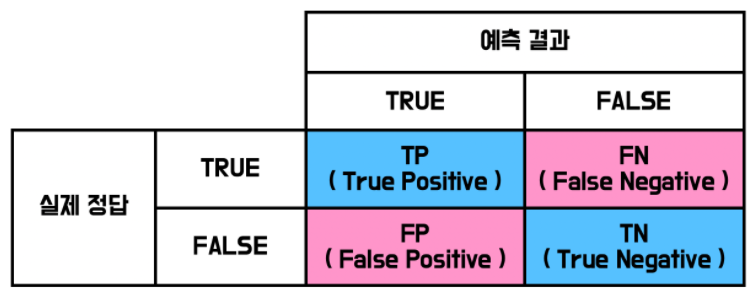<br/><br/>
- 파란색: 예측을 잘함
- 빨간색: 예측을 잘못함
<br/><br/>
- T_: 정답 맞힘
- F_: 정답 못 맞힘
- _P: 참으로 예측함
- _N: 거짓으로 예측함
<br/><br/>
- TP: 정답 참, 참으로 예측
- TN: 정답 거짓, 거짓으로 예측
- FP: 정답 거짓, 참으로 예측
- FN: 정답 참, 거짓으로 예측

#### 혼동 행렬을 통한 분류 모델 평가 지표
1. 정확도(Accuracy)
- 모델이 얼마나 정확하게 예측했는지. 
- $\frac{TP+TN}{TP+TN+FP+FN}$
- 정답의 비율이 불균형하면 정확도를 신뢰하기 어려움.

2. 정밀도(Precision)
- 참이라 예측했을 때 실제 참인 비율
- $\frac{TP}{TP+FP}$
- 높을수록 거짓을 참이라 예측한 정도가 낮음.

3. 재현도(Recall)
- 실제 참인 경우, 참으로 예측한 비율
- $\frac{TP}{TP+FN}$
- 높을수록 참을 거짓으로 예측한 정도가 낮음
<br/><br/>

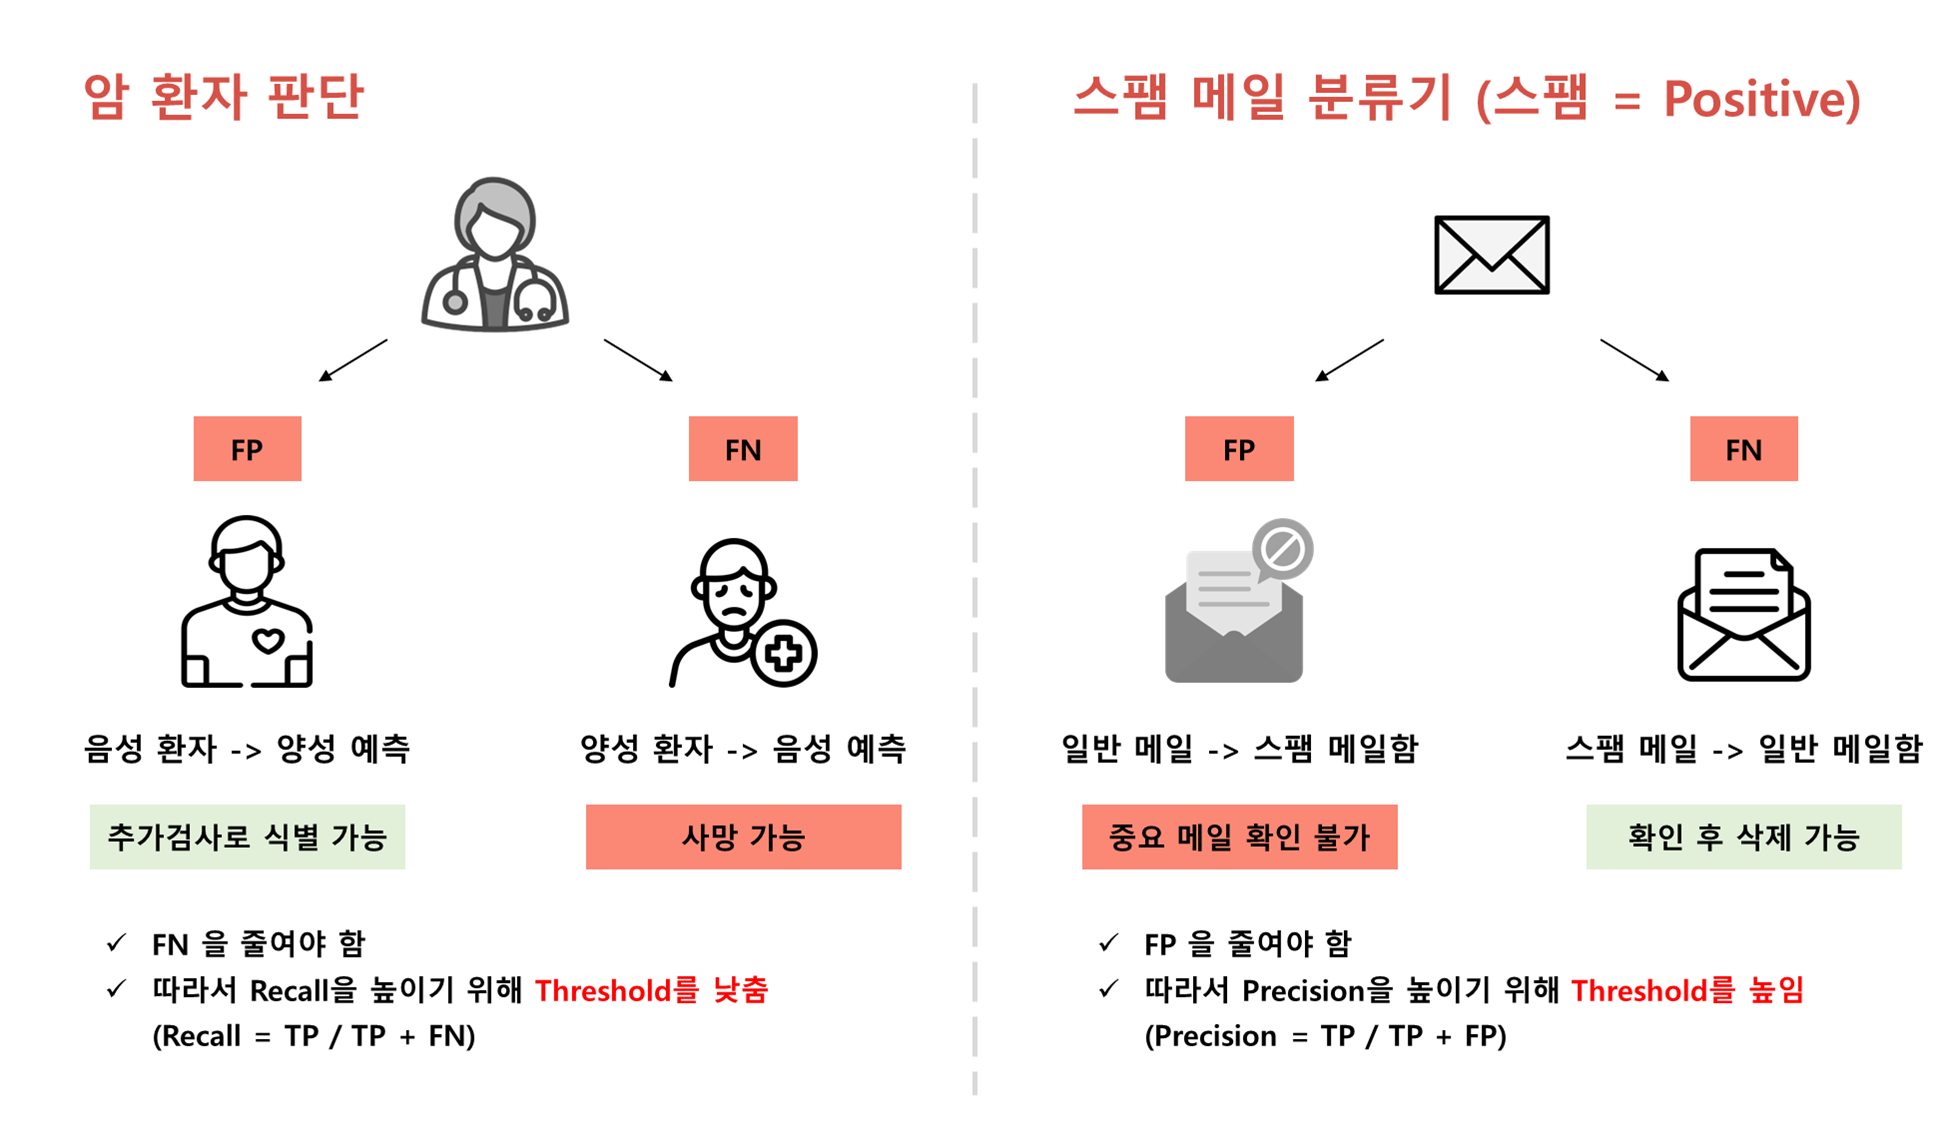
<br/><br/>

- Precision과 Recall은 trade-off이다(threshold).
  - Threshold 이상이면 참, 미만이면 거짓
  - Threshold 낮춤 -> Positive 예측 증가 → recall 커짐
  - Threshold 높임 -> Positive 예측 감소 → precision 커짐

#### 정밀도 & 재현도 그래프
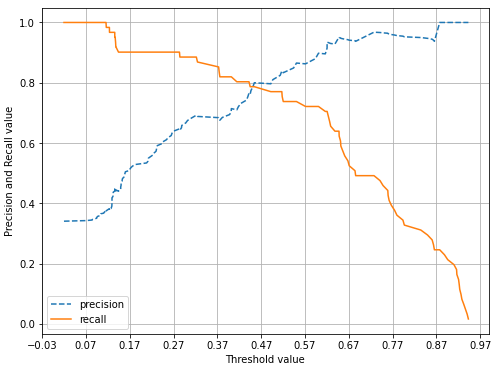<br/>
- 교차 지점으로 정하면 예측 오류를 최소화할 수 있음.

## (2) F1-Score
- 정밀도와 재현율의 조화 평균<br/><br/>
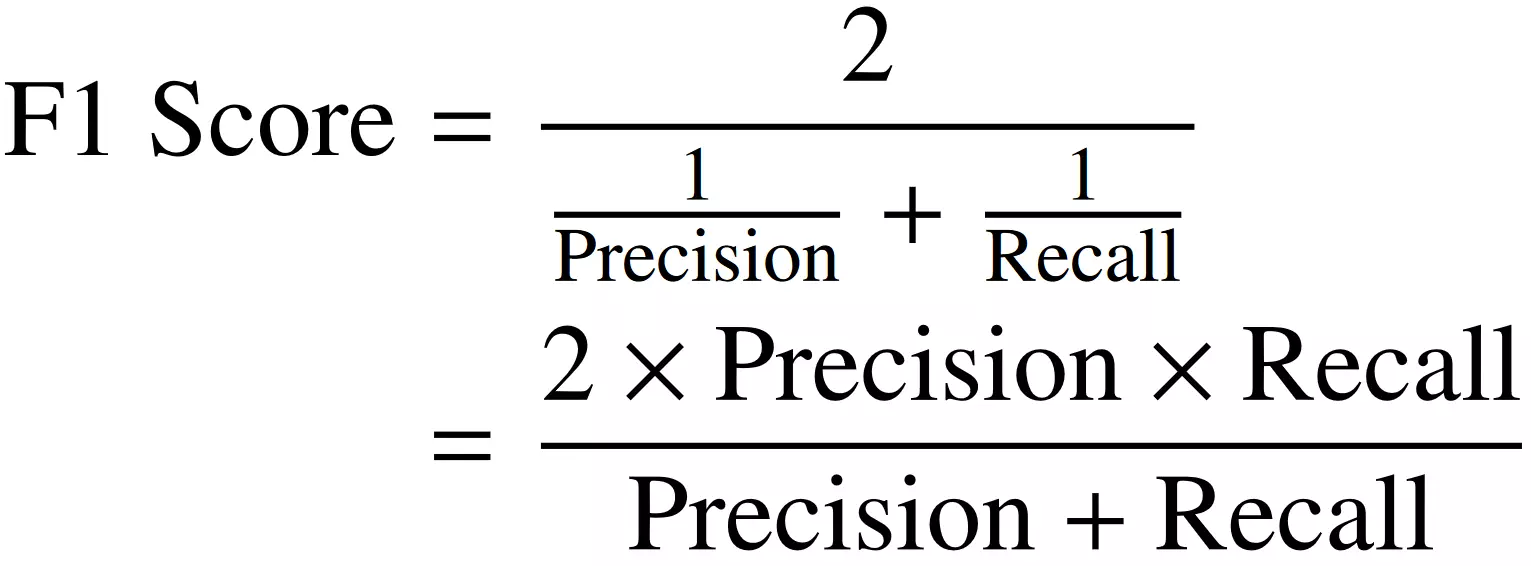

## (3) ROC/AUC Curve
- ROC Curve: 얼마나 잘 분류되었는지
- True Positive Rage(TPR): 참인 것 중 참이라 예측한 비율 = Recall
- False Positive Rate(FPR): 거짓인 것 중 참이라 잘못 예측한 비율
- 현실을 고려하여 도출해야 한다.<br/><br/>
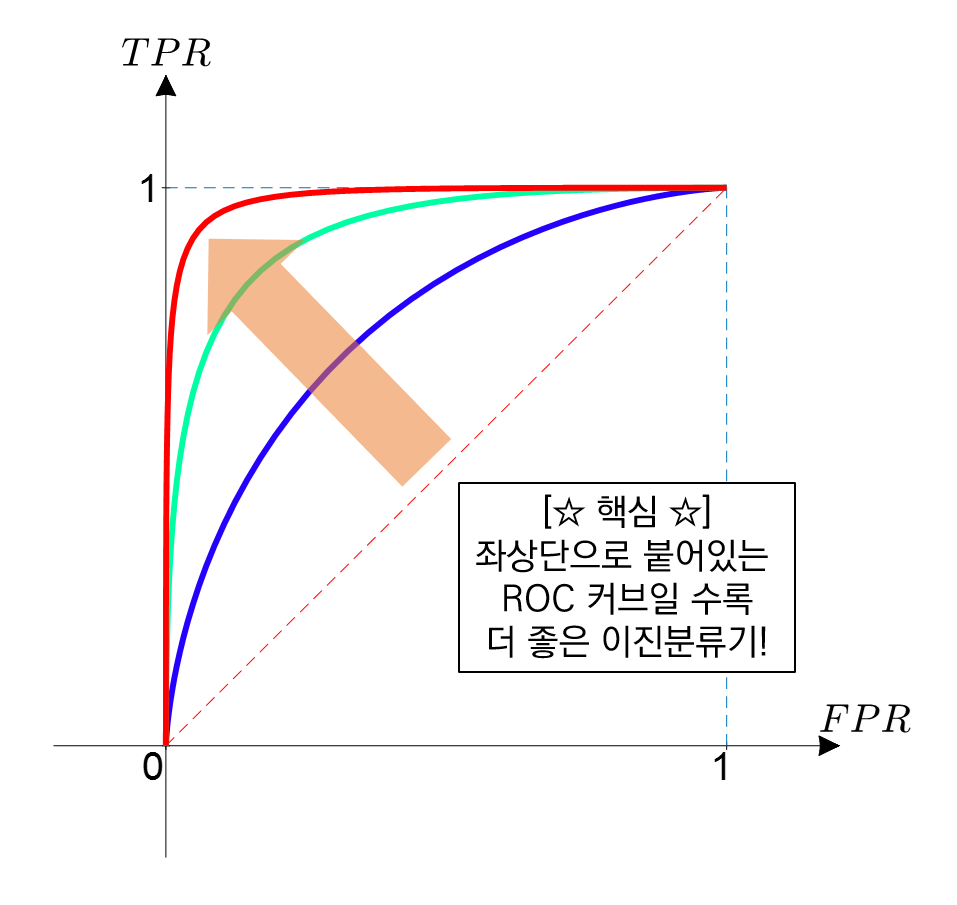<br/><br/><br/>

- AUC Curve: ROC와 x축 사이의 면적
- 모델의 성능을 0.5~1로 나타냄. 1에 가까울수록 좋다.<br/><br/>
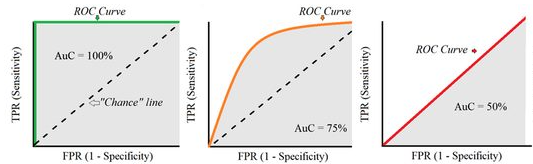


## (4) (참고) 다중 분류 평가 지표
- Macro average: 클래스 별 지표 평균
  - 모든 클래스에 동등한 가중치
- Weighted average: 클래스 별 지표 가중 평균
  - 빈도가 높은 클래스에 가중치
- Micro average: 모든 클래스의 예측 결과를 더해 전체적인 성능 평가
- 모든 클래스에 동등한 가중치(accuracy)

# 하이퍼파라미터 최적화
## (1) 하이퍼파라미터 최적화
**하이퍼파라미터**
- 사용자 설정 변수
- 적절한 값을 찾아 최적화해야 좋음<br/><br/>

**하이퍼파라미터 최적화 과정**
1. Hyperparameter 범위 설정(최적화 하려는 거 정하기)
2. 평가지표 계산 함수 정의(탐색하려는 것을 인수로 받아 지표 계산 함수 정의)
3. 검증 데이터로 정확도 평가
4. 위를 반복하여 정확도를 보고 하이퍼파라미터 범위 좁히기

## (2) 하이퍼파라미터 최적화 방법

1. Grid Search
- 정해진 범위에서 모두 순회하여 가장 좋은 걸 찾아냄
- 최적해를 정확히 찾을 수 있음.
- 그래서 시간이 오래 걸림<br/><br/>

2. Random search
- 정해진 범위에서 무작위 탐색 가장 좋은 걸 찾아냄
- grid보다 빠름. 
- 무작위라 정확도가 떨어짐.<br/><br/>

3. Bayesian Optimization
- 사전 정보를 바탕으로 확률 추정하여 최적값을 찾아냄
- 가장 큰 값이 나올 확률이 높은 지점을 찾아냄
- 무작위로 실험해보고 예측함. 그러면서 다음 실험 조합 선택하기를 반복<br/><br/>

참고1: 검증을 위해 validation data 이용하기<br/>
참고2: 자동화를 위해 Optuna 이용하기